![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import initializers
from keras import optimizers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import metrics as m

In [12]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


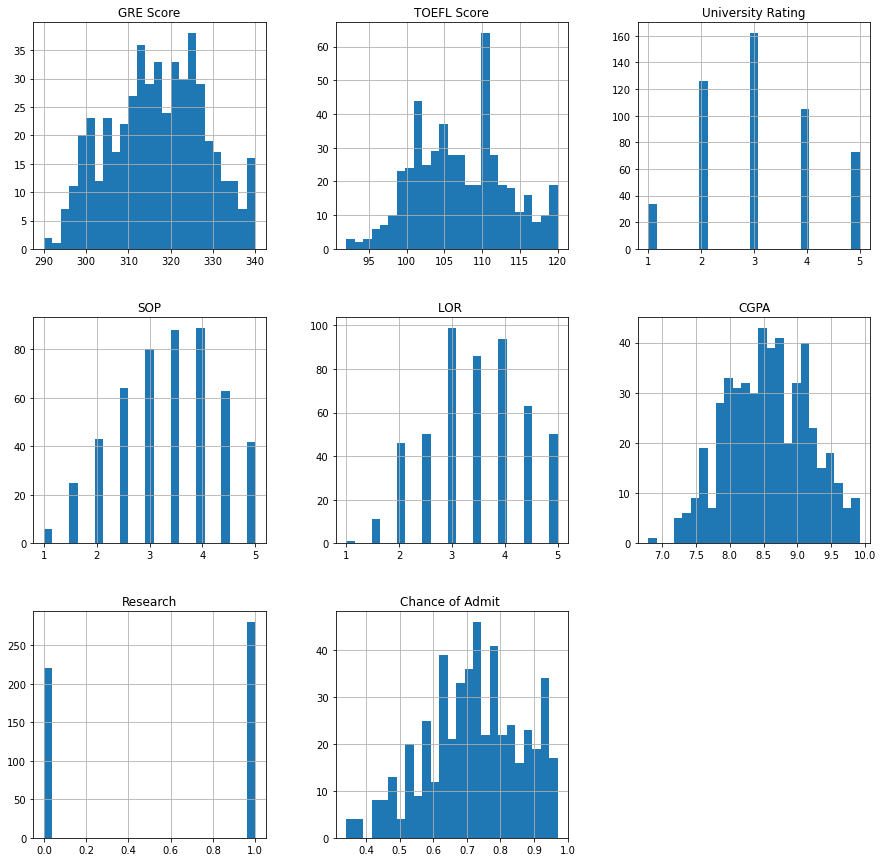

In [13]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [14]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [15]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [16]:
# Normalización de variables predictoras (X) con la función StandardScaler - Es imprescindible la estandarización de variables
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

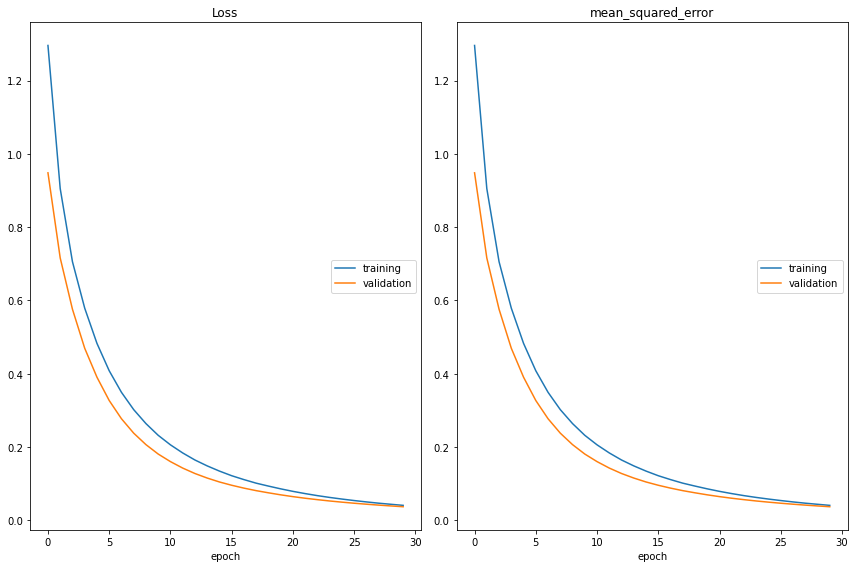

Loss
	training         	 (min:    0.041, max:    1.296, cur:    0.041)
	validation       	 (min:    0.037, max:    0.948, cur:    0.037)
mean_squared_error
	training         	 (min:    0.041, max:    1.296, cur:    0.041)
	validation       	 (min:    0.037, max:    0.948, cur:    0.037)


In [17]:
# Celda 1

# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
#!pip install livelossplot
from livelossplot import PlotLossesKeras
from keras import backend as K
from keras import metrics
import keras.optimizers as opts

# Definición de dimensiones de salida, variables de interés
output_var = 1 #Para evitar hacer el reshape lo declaro en 1 directamente, sabemos que esperamos 1 variable de salida
print(output_var, ' output variables')

# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[
        metrics.MeanSquaredError(),
    ]
)

#Validation
xTrain, xVal, yTrain, yVal = train_test_split(xTrain,yTrain,test_size=0.3, random_state=42)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=30, 
          validation_data=(xVal, yVal),
         callbacks=[PlotLossesKeras()])


In [18]:
model1=model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xVal, yVal))

Epoch 1/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 7/50
8/8 [==============================] 

In [19]:
ypred=model.predict(xTest)
MSERN=np.average(np.square(ypred-yTest))
print('MSE Red una capa:')
print(MSERN)

MAERN=np.average(np.abs(ypred-yTest))
print('MAE Red una capa:')
print(MAERN)

MSE Red una capa:
0.04256862122766823
MAE Red una capa:
0.16614813144281176


> ### Resultados

>* Respecto a la red neuronal de una capa se escogió el número de épocas en 30 porque los resultados de las métricas MSE y MAE son menores a si se hace con 50 capas. Sin embargo, también se probó con 200 capas y el resultado es muy similar al de 30 épocas, lo cual nos indica dos cosas: primero que con tantas épocas puede producirse overfitting y segundo que con 30 épocas se obtiene la misma eficiencia que con 200.

>* En teoría en MSE/MAE debería ser menor en la época 30 al agregar la métrica dentro del compile del modelo y si bien es muy similar la de 30 a la de 50, la de 50 es un poco más pequeña, sin embargo, esto difere al momento de correr en el test, donde la de 30 tiene mejor resultado.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

1  output variables
7 input variables
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
8/8 [==============================] - 1s 44ms/step - loss: 0.4275 - val_loss: 0.2709
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2009 - val_loss: 0.1918
Epoch 3/50
8/

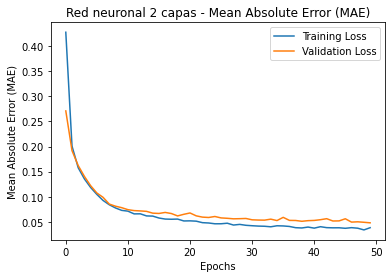

In [20]:
# Celda 2
# Definición de dimensiones de salida, variables de interés
output_var = 1 #Para evitar hacer el reshape lo declaro en 1 directamente, sabemos que esperamos 1 variable de salida
print(output_var, ' output variables')

# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_absolute_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_absolute_error')


# Entrenamiento de la red neuronal con 50 épocas
model_fit=model.fit(xTrain, yTrain,
            validation_data = (xTest, yTest),
            epochs=50)


plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Red neuronal 2 capas - Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
8/8 [==============================] - 0s 25ms/step - loss: 0.2379 - val_loss: 0.0932
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0686 - val_loss: 0.0527
Epoch 3/50
8/8 [==============================] - 0s

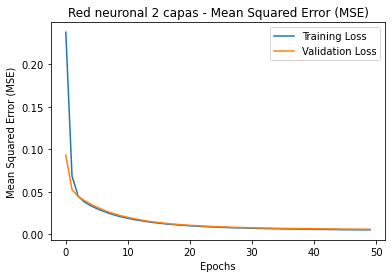

In [21]:
# Se repite el procedimiento pero aplicando otra función de perdida

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_absolute_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')


# Entrenamiento de la red neuronal con 50 épocas
model_fit=model.fit(xTrain, yTrain,
            validation_data = (xTest, yTest),
            epochs=50)


plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Red neuronal 2 capas - Mean Squared Error (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [22]:
ypred=model.predict(xTest)
MSERN2C=np.average(np.square(ypred-yTest))
print('MSE Red multicapa:')
print(MSERN2C)

MAERN2C=np.average(np.abs(ypred-yTest))
print('MAE Red multicapa:')
print(MAERN2C)

MSE Red multicapa:
0.043099903366753727
MAE Red multicapa:
0.1678275388303333


> ### Resultados

> Para el modelo se definieron 2 capas con 256 neuronas y como función de activación Rectified linear unit (relu) en la cual solo activa la neurona si el input esta por encima de cero, evitando problemas de vanishing gradients (desvanecimiento del gradiente) gracias al comportamiento de su derivada que es cero o constante.

> Para la función de perdida se realizo un comparativo entre las dos funciones mas utilizadas Mean Absolute Error (MAE) y Mean Squared Error (MSE), obteniendo un modelo mas estable con el MSE y mejores resultados para la perdida tanto en entrenamiento como en validación.

> Finalmente se calcula el desempeño final del modelo con 50 epocas ya que se evidencia visualmente que apartir de la epoca 40 ya se consigue una estabilidad.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [23]:
# Celda 3
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.layers import Dense, Activation
from keras import metrics as m


# Definición de dimensiones de salida, variables de interés
output_var = 1 #Para evitar hacer el reshape lo declaro en 1 directamente, sabemos que esperamos 1 variable de salida
print(output_var, ' output variables')

# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')


#Red Neuronal multicapa con early stopping y dropout - 256 Neuronas, 50 épocas y 0.2 tasa para dropout ----------------------------------------------------------------------------------

def red_neuronal (numero_neuronas, epocas, tasa_dropout): 
  print('Red Neuronal multicapa con early stopping y dropout - '+ str(numero_neuronas) +' Neuronas, '+ str(epocas) +' épocas y '+ str(tasa_dropout) +' tasa para dropout')
 
  #Declaración de la red neuronal---------------------------------------------------------------------
  K.clear_session()

  # Definición red neuronal con la función Sequential(), para poner las capas una a una
  model = Sequential()

  # Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
  model.add(Dense(numero_neuronas, input_shape=(dims,),activation='relu'))
  model.add(Dropout(tasa_dropout))
  model.add(Dense(numero_neuronas,activation='relu'))
  model.add(Dropout(tasa_dropout))
  model.add(Dense(output_var))
  model.add(Activation('relu'))

  # Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
  model.compile(optimizer='sgd', loss='mean_squared_error', metrics=[m.MeanAbsoluteError(name='mae')])

  # Impresión de la arquitectura de la red neuronal
  print(model.summary())

  # Definición de la función EarlyStopping para considerar durante el entrenamiento
  early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

  # Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
  fBestModel = 'best_model.h5'
  best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

  # Entrenamiento de la red neuronal con 50 épocas y early stopping
  # Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
  X_train, X_val, Y_train, Y_val = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)
  model_ = model.fit(xTrain, yTrain, 
            verbose=True, 
            epochs=epocas, 
            batch_size=128,
            validation_data=(X_val,Y_val),
            callbacks=[best_model, early_stop])
  
  #yPred = model.predict(xTest)
  return model_ , model

def graficas_model (model, numero_neuronas, epocas, tasa_dropout):
  print('')
  print('Red Neuronal multicapa con early stopping y dropout - '+ str(numero_neuronas) +' Neuronas, '+ str(epocas) +' épocas y '+ str(tasa_dropout) +' tasa para dropout')
  #plot the training
  print('--------------------Early stopping - Mean Squared Error (MSE)--------------------')
  plt.plot(model.history['loss'], label='Training Loss')
  plt.plot(model.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Squared Error (MSE)')
  plt.show()

  print('--------------------Early stopping - Mean Absolute Error (MAE)--------------------')
  plt.plot(model.history['mae'], label='Training Loss')
  plt.plot(model.history['val_mae'], label='Validation Loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (MAE)')
  plt.show()

1  output variables
7 input variables


Red Neuronal multicapa con early stopping y dropout - 256 Neuronas, 50 épocas y 0.2 tasa para dropout
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 68,097

Epoch 1/50
2/2 [==============================] - 0s 125ms/step - loss: 0.3509 - mae: 0.5516 - val_loss: 0.2881 - val_mae: 0.5074
Epoch 2/50
2/2 [==============================] - 0s 22ms/step - loss: 0.2608 - mae: 0.4623 - val_loss: 0.2192 - val_mae: 0.4378
Epoch 3/50
2/2 [==============================] - 0s 20ms/step - loss: 0.2205 - mae: 0.4225 - val_loss: 0.1699 - val_mae: 0.3787
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 0.1579 - mae: 0.3466 - val_loss: 0.1355 - val_mae: 0.3307
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 0.1533 - mae: 0.3419 - val_loss: 0.1086 - val_mae: 0.2913
Epoch 6/50
2/2 [==============================] - 0s 20ms/step - loss: 0.1248 - mae: 0.3001 - val_loss: 0.0948 - val_mae: 0.2697
Epoch 7/50
2/2 [==============================] - 0s 21ms/step - loss: 0.1073 - mae: 0.2787 - val_loss: 0.0833 - val_mae: 0.2529
Epoch 8/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0994 - mae: 0.2623 - va

2/2 [==============================] - 0s 57ms/step - loss: 0.1373 - mae: 0.3318 - val_loss: 0.1088 - val_mae: 0.3051
Epoch 5/150
2/2 [==============================] - 0s 62ms/step - loss: 0.1014 - mae: 0.2778 - val_loss: 0.0880 - val_mae: 0.2695
Epoch 6/150
2/2 [==============================] - 0s 33ms/step - loss: 0.0877 - mae: 0.2569 - val_loss: 0.0735 - val_mae: 0.2440
Epoch 7/150
2/2 [==============================] - 0s 32ms/step - loss: 0.0784 - mae: 0.2399 - val_loss: 0.0636 - val_mae: 0.2269
Epoch 8/150
2/2 [==============================] - 0s 42ms/step - loss: 0.0757 - mae: 0.2355 - val_loss: 0.0557 - val_mae: 0.2129
Epoch 9/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0621 - mae: 0.2106 - val_loss: 0.0512 - val_mae: 0.2039
Epoch 10/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0665 - mae: 0.2173 - val_loss: 0.0466 - val_mae: 0.1943
Epoch 11/150
2/2 [==============================] - 0s 46ms/step - loss: 0.0649 - mae: 0.2151 - val_l

Epoch 67/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0251 - mae: 0.1240 - val_loss: 0.0095 - val_mae: 0.0832
Epoch 68/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0236 - mae: 0.1242 - val_loss: 0.0094 - val_mae: 0.0823
Epoch 69/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0279 - mae: 0.1312 - val_loss: 0.0093 - val_mae: 0.0822
Epoch 70/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0274 - mae: 0.1304 - val_loss: 0.0093 - val_mae: 0.0823
Epoch 71/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0266 - mae: 0.1253 - val_loss: 0.0091 - val_mae: 0.0809
Epoch 72/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0277 - mae: 0.1333 - val_loss: 0.0090 - val_mae: 0.0804
Epoch 73/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0261 - mae: 0.1255 - val_loss: 0.0088 - val_mae: 0.0787
Epoch 74/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0254 - m

Epoch 10/150
2/2 [==============================] - 0s 28ms/step - loss: 0.1305 - mae: 0.3040 - val_loss: 0.1049 - val_mae: 0.2783
Epoch 11/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1357 - mae: 0.3068 - val_loss: 0.0960 - val_mae: 0.2654
Epoch 12/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1082 - mae: 0.2801 - val_loss: 0.0867 - val_mae: 0.2520
Epoch 13/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1038 - mae: 0.2709 - val_loss: 0.0803 - val_mae: 0.2409
Epoch 14/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0992 - mae: 0.2605 - val_loss: 0.0753 - val_mae: 0.2317
Epoch 15/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0997 - mae: 0.2639 - val_loss: 0.0710 - val_mae: 0.2234
Epoch 16/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0959 - mae: 0.2518 - val_loss: 0.0688 - val_mae: 0.2191
Epoch 17/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0810 - m

2/2 [==============================] - 0s 21ms/step - loss: 0.0407 - mae: 0.1612 - val_loss: 0.0147 - val_mae: 0.0935
Epoch 73/150
2/2 [==============================] - 0s 45ms/step - loss: 0.0387 - mae: 0.1556 - val_loss: 0.0145 - val_mae: 0.0929
Epoch 74/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0372 - mae: 0.1585 - val_loss: 0.0143 - val_mae: 0.0926
Epoch 75/150
2/2 [==============================] - 0s 27ms/step - loss: 0.0427 - mae: 0.1647 - val_loss: 0.0141 - val_mae: 0.0916
Epoch 76/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0379 - mae: 0.1558 - val_loss: 0.0137 - val_mae: 0.0899
Epoch 77/150
2/2 [==============================] - 0s 25ms/step - loss: 0.0422 - mae: 0.1618 - val_loss: 0.0134 - val_mae: 0.0882
Epoch 78/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0399 - mae: 0.1597 - val_loss: 0.0133 - val_mae: 0.0883
Epoch 79/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0399 - mae: 0.1628 - 

2/2 [==============================] - 0s 27ms/step - loss: 0.0400 - mae: 0.1657 - val_loss: 0.0367 - val_mae: 0.1685
Epoch 20/50
2/2 [==============================] - 0s 28ms/step - loss: 0.0394 - mae: 0.1645 - val_loss: 0.0355 - val_mae: 0.1654
Epoch 21/50
2/2 [==============================] - 0s 26ms/step - loss: 0.0388 - mae: 0.1594 - val_loss: 0.0346 - val_mae: 0.1633
Epoch 22/50
2/2 [==============================] - 0s 30ms/step - loss: 0.0410 - mae: 0.1693 - val_loss: 0.0336 - val_mae: 0.1609
Epoch 23/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0409 - mae: 0.1715 - val_loss: 0.0325 - val_mae: 0.1581
Epoch 24/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0379 - mae: 0.1578 - val_loss: 0.0315 - val_mae: 0.1556
Epoch 25/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0366 - mae: 0.1587 - val_loss: 0.0307 - val_mae: 0.1536
Epoch 26/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0360 - mae: 0.1578 - val_los

2/2 [==============================] - 0s 21ms/step - loss: 0.0464 - mae: 0.1740 - val_loss: 0.0236 - val_mae: 0.1345
Epoch 23/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0390 - mae: 0.1647 - val_loss: 0.0230 - val_mae: 0.1330
Epoch 24/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0383 - mae: 0.1582 - val_loss: 0.0226 - val_mae: 0.1317
Epoch 25/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0346 - mae: 0.1521 - val_loss: 0.0221 - val_mae: 0.1304
Epoch 26/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0339 - mae: 0.1469 - val_loss: 0.0218 - val_mae: 0.1296
Epoch 27/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0360 - mae: 0.1488 - val_loss: 0.0214 - val_mae: 0.1287
Epoch 28/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0361 - mae: 0.1521 - val_loss: 0.0213 - val_mae: 0.1280
Epoch 29/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0347 - mae: 0.1547 - val_los

2/2 [==============================] - 0s 22ms/step - loss: 0.0328 - mae: 0.1459 - val_loss: 0.0314 - val_mae: 0.1553
Epoch 26/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0354 - mae: 0.1577 - val_loss: 0.0305 - val_mae: 0.1529
Epoch 27/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0313 - mae: 0.1431 - val_loss: 0.0298 - val_mae: 0.1510
Epoch 28/150
2/2 [==============================] - 0s 25ms/step - loss: 0.0345 - mae: 0.1543 - val_loss: 0.0288 - val_mae: 0.1480
Epoch 29/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0298 - mae: 0.1437 - val_loss: 0.0280 - val_mae: 0.1457
Epoch 30/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0289 - mae: 0.1403 - val_loss: 0.0272 - val_mae: 0.1431
Epoch 31/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0296 - mae: 0.1435 - val_loss: 0.0266 - val_mae: 0.1415
Epoch 32/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0304 - mae: 0.1435 - 

2/2 [==============================] - 0s 21ms/step - loss: 0.0146 - mae: 0.0986 - val_loss: 0.0102 - val_mae: 0.0834
Epoch 88/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0155 - mae: 0.1012 - val_loss: 0.0101 - val_mae: 0.0828
Epoch 89/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0147 - mae: 0.0989 - val_loss: 0.0100 - val_mae: 0.0823
Epoch 90/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0171 - mae: 0.1031 - val_loss: 0.0100 - val_mae: 0.0825
Epoch 91/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0148 - mae: 0.0984 - val_loss: 0.0098 - val_mae: 0.0814
Epoch 92/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0170 - mae: 0.1028 - val_loss: 0.0097 - val_mae: 0.0814
Epoch 93/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0141 - mae: 0.0958 - val_loss: 0.0097 - val_mae: 0.0812
Epoch 94/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0158 - mae: 0.0984 - 

Epoch 149/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0110 - mae: 0.0811 - val_loss: 0.0065 - val_mae: 0.0676
Epoch 150/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0117 - mae: 0.0871 - val_loss: 0.0065 - val_mae: 0.0673
Red Neuronal multicapa con early stopping y dropout - 128 Neuronas, 150 épocas y 0.1 tasa para dropout
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
___________________

2/2 [==============================] - 0s 20ms/step - loss: 0.0300 - mae: 0.1415 - val_loss: 0.0178 - val_mae: 0.1081
Epoch 53/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0366 - mae: 0.1525 - val_loss: 0.0173 - val_mae: 0.1066
Epoch 54/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0319 - mae: 0.1429 - val_loss: 0.0171 - val_mae: 0.1058
Epoch 55/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0302 - mae: 0.1459 - val_loss: 0.0166 - val_mae: 0.1044
Epoch 56/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0312 - mae: 0.1405 - val_loss: 0.0163 - val_mae: 0.1035
Epoch 57/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0265 - mae: 0.1340 - val_loss: 0.0160 - val_mae: 0.1024
Epoch 58/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0278 - mae: 0.1339 - val_loss: 0.0155 - val_mae: 0.1014
Epoch 59/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0276 - mae: 0.1340 - 

2/2 [==============================] - 0s 21ms/step - loss: 0.0180 - mae: 0.1051 - val_loss: 0.0075 - val_mae: 0.0721
Epoch 115/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0202 - mae: 0.1122 - val_loss: 0.0075 - val_mae: 0.0719
Epoch 116/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0182 - mae: 0.1085 - val_loss: 0.0075 - val_mae: 0.0714
Epoch 117/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0192 - mae: 0.1043 - val_loss: 0.0074 - val_mae: 0.0714
Epoch 118/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0183 - mae: 0.1045 - val_loss: 0.0073 - val_mae: 0.0713
Epoch 119/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0208 - mae: 0.1156 - val_loss: 0.0073 - val_mae: 0.0715
Epoch 120/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0210 - mae: 0.1140 - val_loss: 0.0072 - val_mae: 0.0708
Epoch 121/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0190 - mae: 0.

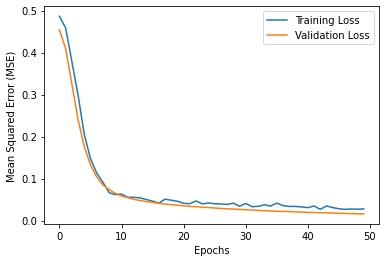

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


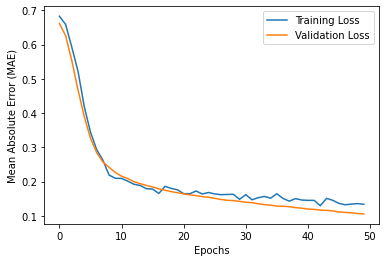


Red Neuronal multicapa con early stopping y dropout - 128 Neuronas, 50 épocas y 0.2 tasa para dropout
--------------------Early stopping - Mean Squared Error (MSE)--------------------


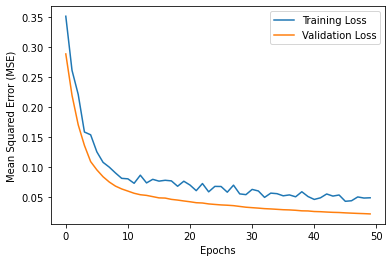

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


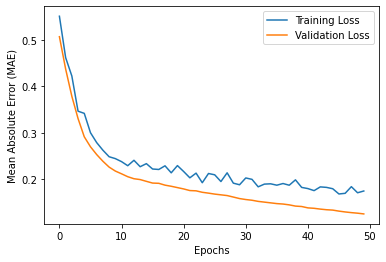


Red Neuronal multicapa con early stopping y dropout - 256 Neuronas, 150 épocas y 0.2 tasa para dropout
--------------------Early stopping - Mean Squared Error (MSE)--------------------


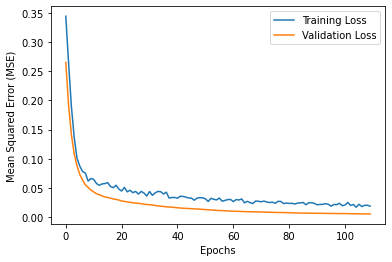

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


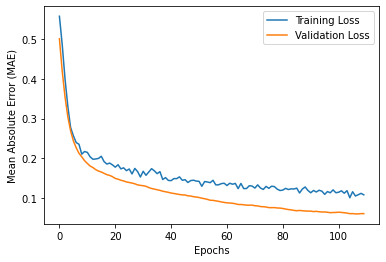


Red Neuronal multicapa con early stopping y dropout - 128 Neuronas, 150 épocas y 0.2 tasa para dropout
--------------------Early stopping - Mean Squared Error (MSE)--------------------


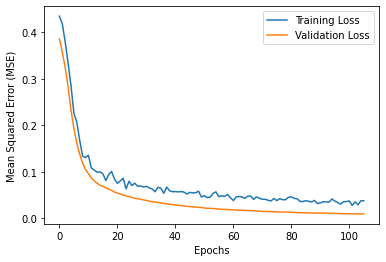

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


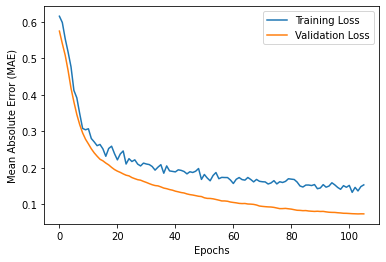


Red Neuronal multicapa con early stopping y dropout - 256 Neuronas, 50 épocas y 0.1 tasa para dropout
--------------------Early stopping - Mean Squared Error (MSE)--------------------


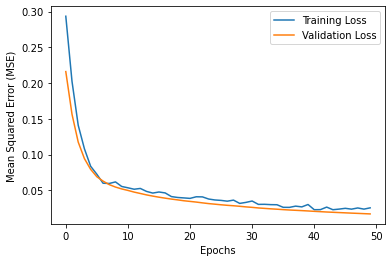

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


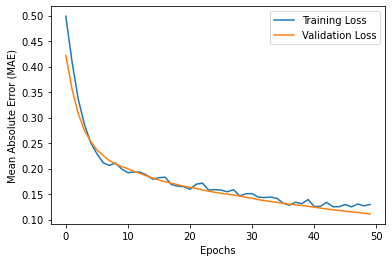


Red Neuronal multicapa con early stopping y dropout - 128 Neuronas, 50 épocas y 0.1 tasa para dropout
--------------------Early stopping - Mean Squared Error (MSE)--------------------


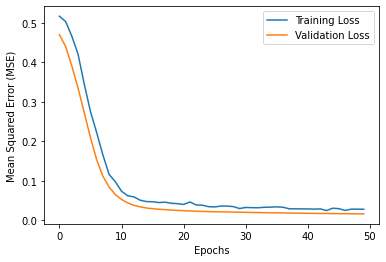

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


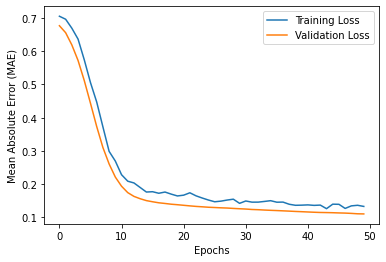


Red Neuronal multicapa con early stopping y dropout - 256 Neuronas, 150 épocas y 0.1 tasa para dropout
--------------------Early stopping - Mean Squared Error (MSE)--------------------


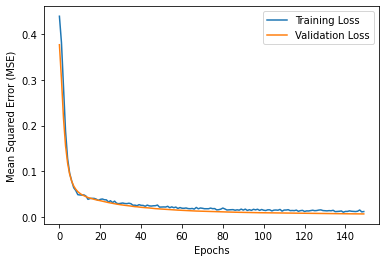

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


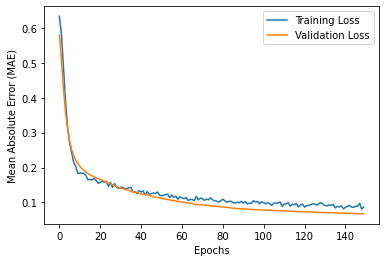


Red Neuronal multicapa con early stopping y dropout - 128 Neuronas, 150 épocas y 0.1 tasa para dropout
--------------------Early stopping - Mean Squared Error (MSE)--------------------


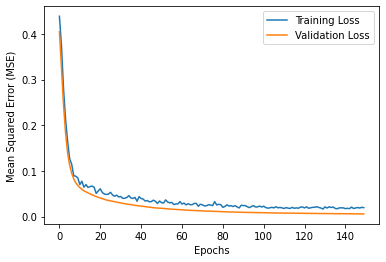

--------------------Early stopping - Mean Absolute Error (MAE)--------------------


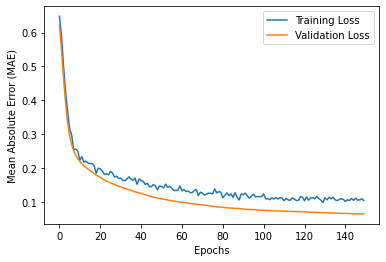

In [24]:
model_256_50_02 =  red_neuronal (256, 50, 0.2)
model_128_50_02 =  red_neuronal (128, 50, 0.2)
model_256_150_02 =  red_neuronal (256, 150, 0.2)
model_128_150_02 =  red_neuronal (128, 150, 0.2)
model_256_50_01 =  red_neuronal (256, 50, 0.1)
model_128_50_01 =  red_neuronal (128, 50, 0.1)
model_256_150_01 =  red_neuronal (256, 150, 0.1)
model_128_150_01 =  red_neuronal (128, 150, 0.1)

graficas_model (model_256_50_02[0], 256, 50, 0.2)
graficas_model (model_128_50_02[0], 128, 50, 0.2)
graficas_model (model_256_150_02[0], 256, 150, 0.2)
graficas_model (model_128_150_02[0], 128, 150, 0.2)
graficas_model (model_256_50_01[0], 256, 50, 0.1)
graficas_model (model_128_50_01[0], 128, 50, 0.1)
graficas_model (model_256_150_01[0], 256, 150, 0.1)
graficas_model (model_128_150_01[0], 128, 150, 0.1)


In [25]:
#Predicción con el mejor modelo
yPred = model_256_150_02[1].predict(xTest)
MSEMED=np.average(np.square(yPred-yTest))
print('MSE')
print(MSEMED)

MAEMED=np.average(np.abs(yPred-yTest))
print('MAE')
print(MAEMED)

MSE
0.04326289925912808
MAE
0.16849968944867452


> ### Resultados

> Es algo implícito que las variables estén estandarizadas por algún método, en este caso se utilizó StandardScaler, método sugerido en el material de redes neuronales. Esta normalización se realizó al inicio del notebook.

> Como siguiente punto declaramos la variable de respuesta y las 7 variables que vamos a utilizar para predecir. 

> Para este caso se utilizó una red neuronal multicapa (2 capas) implementada con un modelo de tipo secuencial para agregar las capas, se elige el tipo secuencial debido a su facilidad para declarar las mismas. 

> Para la compilación del modelo utilizamos un optimizador sgd (gradiente descendiente) tomando como métricas mean squared error y mean absolute error. Declaramos también la variable early stopping que monitoree la perdida en los datos de validación y si esta no cambia en dos periodos detenga la validación.

> Para el número de neuronas se utilizaron los valores de 256 y 128, para las épocas se utilizaron valores de 50 y 150 y para la tasa del dropout 0.1 y 0.2 (de las unidades de entrada a eliminar). Debido a que no tenemos un método establecido para encontrar el valor que mejor se ajusta a nuestro caso, decidimos usar una serie de combinaciones entre estos valores para al final analizar el comportamiento de la red neuronal y ver cual nos arroja un mejor desempeño. 

> Una vez ejecutado el entrenamiento pudimos observar el funcionamiento del early stopping pues detuvo las ejecuciones antes de terminar el ciclo establecido como fue el caso de la red con 256 neuronas, 150 épocas y tasa de dropout 0.2 o la red con 256 Neuronas, 150 épocas y tasa de dropout 0.1 las cuales se detuvieron antes. 

> De los modelos que mejor desempeño mostraron fue el de 128 Neuronas, 150 épocas y 0.2 tasa para dropout aunque los valores entra train y validation muestran mayor variabilidad, por otra parte el modelo de 256 Neuronas, 150 épocas y 0.2 tasa para dropout muestra valores de error un poco más alto pero la variabilidad entre train y validation es menor.


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

-------------------------------------- Comparación de Modelos MSE --------------------------------------


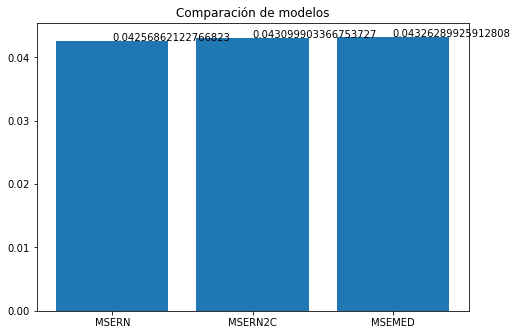

In [26]:
# Celda 4
print('-------------------------------------- Comparación de Modelos MSE --------------------------------------')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['MSERN','MSERN2C', 'MSEMED']
ejeY = [MSERN,MSERN2C,MSEMED]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

-------------------------------------- Comparación de Modelos MAE --------------------------------------


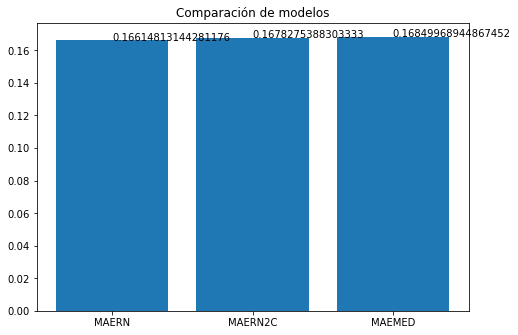

In [27]:
print('-------------------------------------- Comparación de Modelos MAE --------------------------------------')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['MAERN','MAERN2C', 'MAEMED']
ejeY = [MAERN,MAERN2C,MAEMED]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

* A partir de las métricas arrojadas por los modelos concluimos que debido a la baja complejidad de aprendizaje para esta tarea el modelo con una capa arroja el mejor resultado haciendo las calibraciones pertinentes. 
Con modelos sencillos, cuanto menos se necesite que aprenda la red, más fácil resulta enseñarle, entonces, al agregar más capas a un modelo que no es complejo como este, se genera una pérdida de desempeño.

* Como desventaja del modelo de redes neuronales notamos que no permite interpretar lo que se ha aprendido, es decir, el trabajo que hay dentro de las neuronas, simplemente se proporciona una salida que no tiene per se un significado, sino que depende del analítico de datos.